# DS-NYC-45 | Unit Project 1: Research Design Write-Up

In this first unit project you will create a framework to scope out data science projects.  This framework will provide you with a guide to develop a well-articulated problem statement and analysis plan that will be robust and reproducible.

## Part A.  Evaluate the following problem statement:

> "Determine which free-tier customers will covert to paying customers, using demographic data collected at signup (age, gender, location, and profession) and customer useage data (days since last log in, and `activity score 1 = active user`, `0 = inactive user`) based on Hooli data from January-April 2015."

> ### Question 1.  What is the outcome?

Answer:

Create a predictive model of potential coverting customers based on collected demographic and 1st party data. Ultimately to identify paying customer indicators, is it a yes or no.

> ### Question 2.  What are the predictors/covariates?

Answer:

The predictors include demographic information such as age, gender, locations and profession. In addition to customer usesage data that contains time since users last login as well as their activity status.

> ### Question 3.  What timeframe is this data relevent for?

Answer:

#Hooli data has only been collected from January to April 2015.

> ### Question 4.  What is the hypothesis?

Answer:

1st party collected customer information will allow us to predict if a free-tier customer will convert to a paying customer.

## Part B.  Let's start exploring our UCLA dataset and answer some simple questions:

In [42]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv(os.path.join('.', 'ucla-admissions.csv'))

df.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


> ### Question 5.  Create a data dictionary.

Answer: (Use the template below)

Variable | Description | Type of Variable
---|---|---
Var 1 | 0 = Not thing, 1 = Thing | Categorical
Var 2 | Thing in unit X | Continuous

Answer:

 <h1><center>Variable</center></h1> |  <h1><center>Description</center></h1> | <h1><center>Type of Variable</center></h1>
---|---|---
<t1><center>admit (Outcome)</center></t1> | <t1><center> 0 = Rejected, 1 = Accepted</center></t1> | <t1><center>Categorical</center></t1>
<t1><center>gre</center></t1> | <t1><center>Graduate Record Exame Scores</center></t1> | <t1><center>Continuous</center></t1>
<t1><center>gpa</center></t1> | <t1><center>Grade Point Average</center></t1> | <t1><center>Continuous</center></t1>
<t1><center>prestige</center></t1> | <t1><center>Alta Matar Prestige(1-4 Ranking Highest to Lowest)</center></t1> | <t1><center> Ordinal</center></t1>

We would like to explore the association between X and Y.

> ### Question 6.  What is the outcome?

Answer:

Define UCLA Admission indicator (gre, gpa and prestige). Yes or No.

> ### Question 7.  What are the predictors/covariates?

Answer:

The predictors are GRE Score, GPA Score and School Prestige. 

> ### Question 8.  What timeframe is this data relevent for?

Answer:

It is relevant for the timeframe that it was collected which is unclear. It may not reflect any future admission trends.

> ### Question 9.  What is the hypothesis?

Answer:

Examining student GPA, GRE and Presitige will allow us to predict a candidates admittance.  

> ### Question 10.  What's the problem statement?

> Using your answers to the above questions, write a well-formed problem statement.

Answer:

Determine the association between a UCLA candidates GPA, GRE scores and school prestige with a UCLA candidate's likelihood of being accepted as a student. 

## Part C.  Create an exploratory analysis plan by answering the following questions:

Because the answers to these questions haven't yet been covered in class yet, this section is optional.  This is by design.  By having you guess or look around for these answers will help make sense once we cover this material in class.  You will not be penalized for wrong answers but we encourage you to give it a try!

> ### Question 11. What are the goals of the exploratory analysis?

Answer:

The goal of explortatory analysis is to help us as the data scientist get a better understanding of the data set we will be working with. It allows us to examine the structure of the data set defining the below:

    *Define key variables/predictors
        *Defining data types
        *Defining what each variable represents
        *Defining a rank of importance of each variable
    *Understanding the shape and distribution of the data set
    *Highlight inconsistencies of data set
        *Finding N/A, or input errors
        *Identifying outliers or extremes in the data
        *Determining if there is a substancial data to use for analysis
    *Beginning to understand what questions can be answered with the given data set

> ### Question 12.  What are the assumptions of the distribution of data?

Answer:

The assumption of the data distribution is that it is normally distributed and that there is enough of a sample for a statistically significant results. 

> ### Question 13.  How will determine the distribution of your data?

In [43]:
#Using the describe method to see high level distribution of data. What is the mean, median, max, min and interquartile range. 
#As an additional observation we are missing some data points from GRE, GPA and Prestige so I had to drop null values to calculate interquartile range.
df.dropna().describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


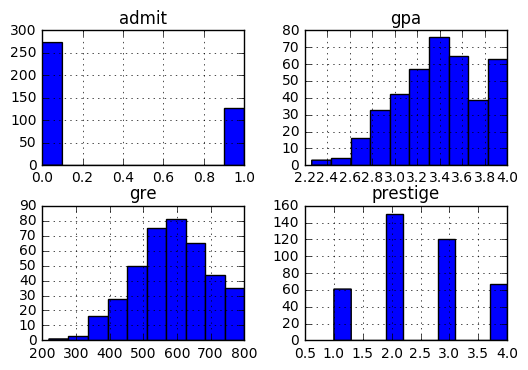

In [44]:
#Using histograms to help define the distribution of each variable. 
#Looking at GRE and GPA I can see that they are fairly normally distributed with a slight left skew.
df.hist();

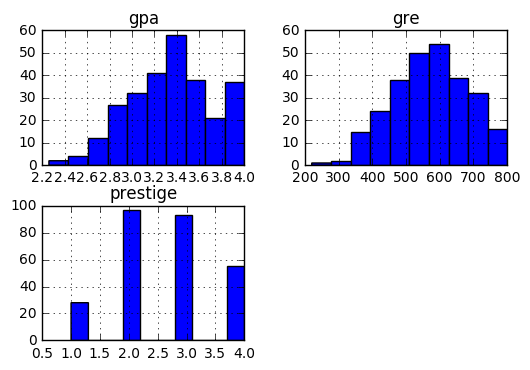

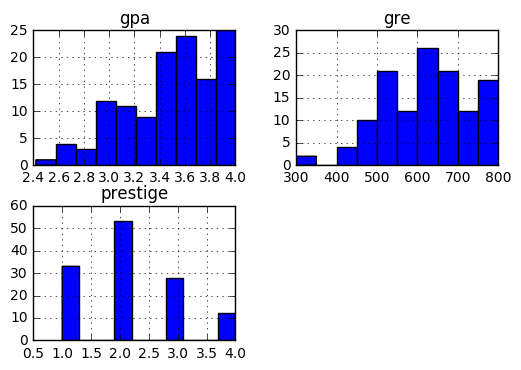

In [45]:
# Understanding how the variables are distributed when grouped by the dependent variable of admission. 
df.groupby('admit').hist();

Answer:

Using basic functions in Pandas you can perform quick tests to explore the shape of your dataframe. Searching through Python packages it appears that there is a package called "Scipy.stats" that allows you to test for normality of the data  

> ### Question 14.  How might outliers impact your analysis?

Answer:

Outliers can heavily impact your analysis by skewing your results. It is import to understand if the outlier is a data entry or storage mistake. If that is the case then I would remove that observation from any testing. If all data is seemingly correct then it would be safe to perform your analysis and observe the results and descide further action. Outliers may create a false significant read and alter your final results.

> ### Question 15.  How will you test for outliers?

Answer:

A simple way would be to create of scatter plot of your X and Y variables that would ultimately illustrate the high level correlation of your data points and show any extremes. Additionally, histograms and box and whisker plots allow for us to examine data distribution by viewing the max and mins of the data and where the mean and median lie on the graphs. You can further test extremes for values well beyond 3 standard deviations plus or minus of the mean. 


> ### Question 16.  What is colinearity?

Answer:

When two or more of your predictor variables are correlated to eachother and not just the response variable. It makes it difficult to determine which is the biggest influencer on the response variable.


> ### Question 17.  How will you test for covariance?

Answer:

There is an analysis of covariance called ANCOVA which determines the population means of a dependent variable with that of a independent variable while controlling for effects caused by covariates that are not the primary interest of the test we are conducting. Pandas has a function called ".cov()" to help compare covariances of columns.

> ### Question 18.  What is your exploratory analysis plan?

> Using the above information, write an exploratory analysis plan that would allow you or a colleague to reproduce your analysis one year from now.

Answer: